In [1]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# set jupyter's max row display
pd.set_option('display.max_row', 1000)

# set jupyter's max column width to 50
pd.set_option('display.max_columns', 50)

In [3]:
df = pd.read_excel('alunos-egressos.xlsx')
df.profile_report()

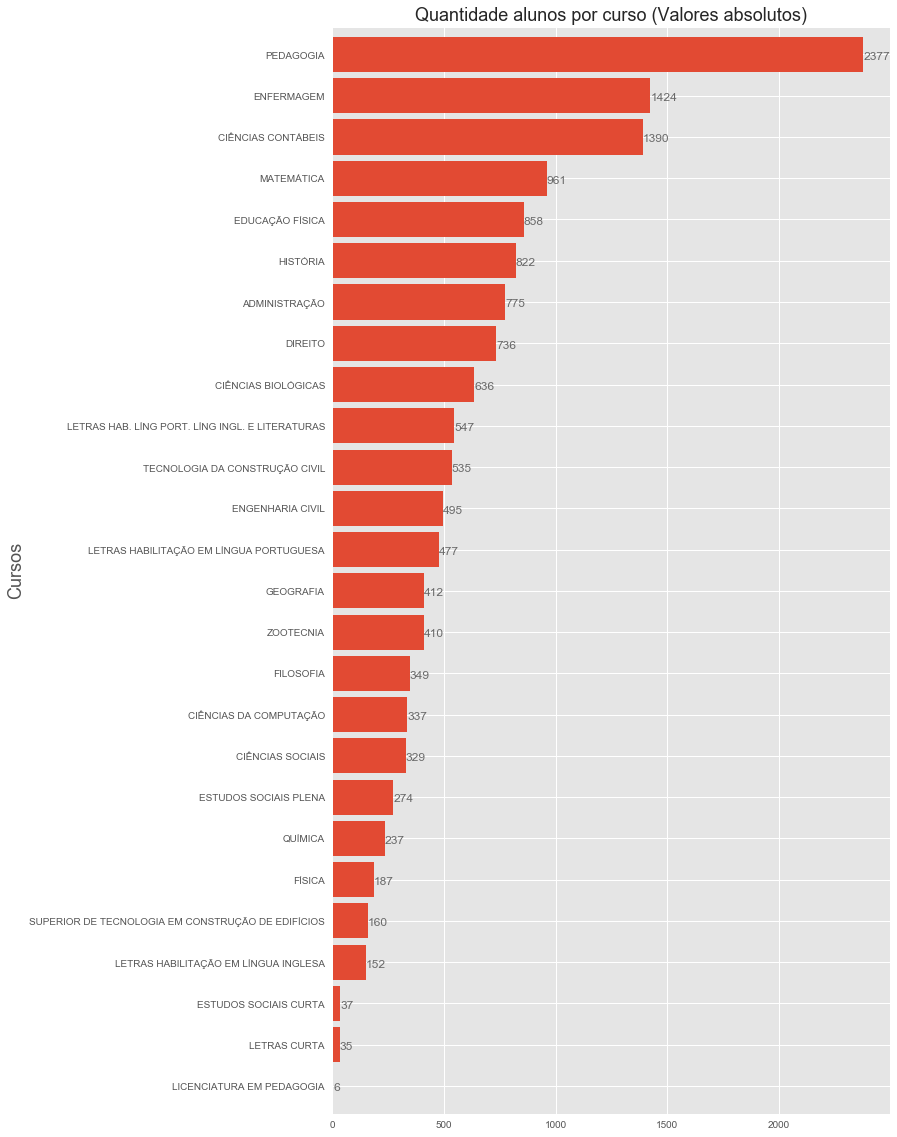

In [10]:
ax = df['CURSO'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 20), width=0.85, fontsize=10)

ax.set_title('Quantidade alunos por curso (Valores absolutos)', fontsize=18)
ax.set_ylabel('Cursos', fontsize=18)

total = df['CURSO'].count()

for i in ax.patches:
    ax.text(i.get_width()+.1, i.get_y()+.31, str(i.get_width()), fontsize=12, color='dimgrey')

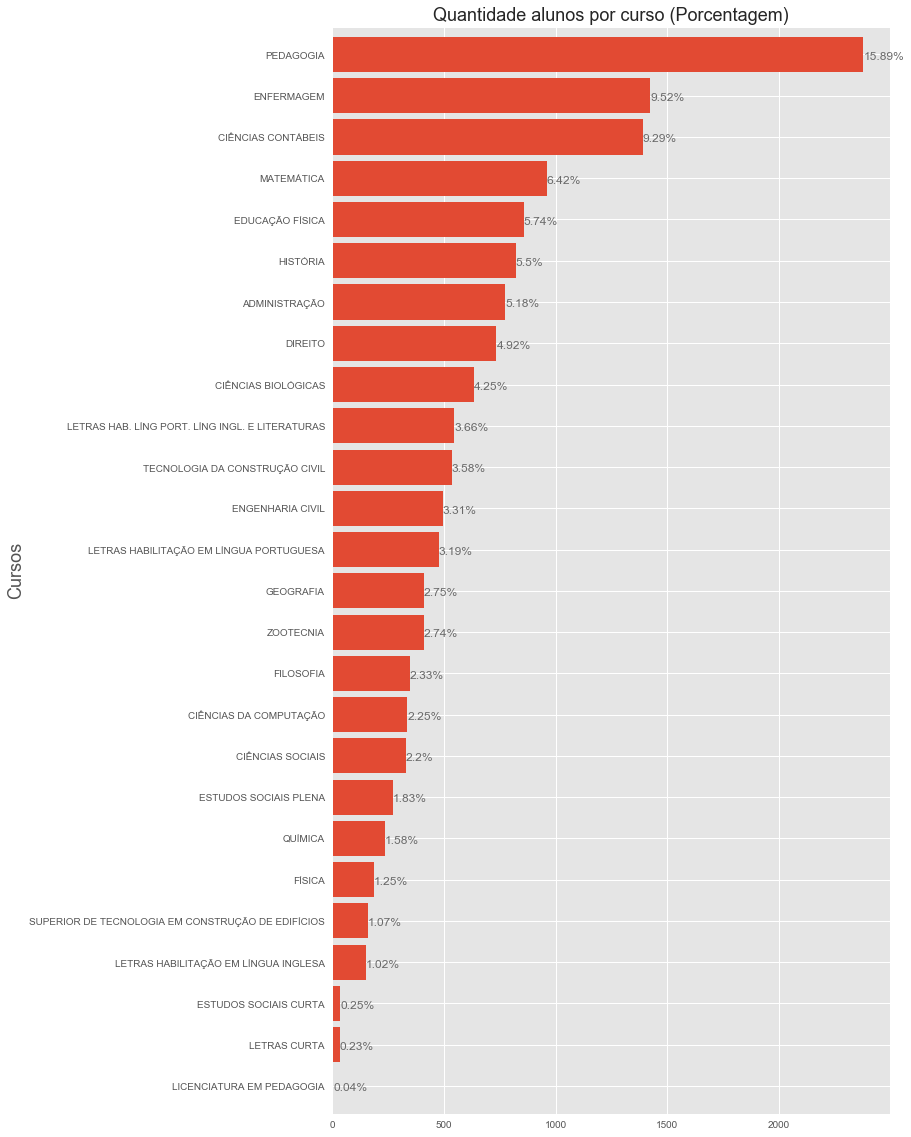

In [11]:
ax = df['CURSO'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 20), width=0.85, fontsize=10)

ax.set_title('Quantidade alunos por curso (Porcentagem)', fontsize=18)
ax.set_ylabel('Cursos', fontsize=18)

total = df['CURSO'].count()

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, str(round((i.get_width()/total)*100, 2))+ '%', fontsize=12, color='dimgrey')

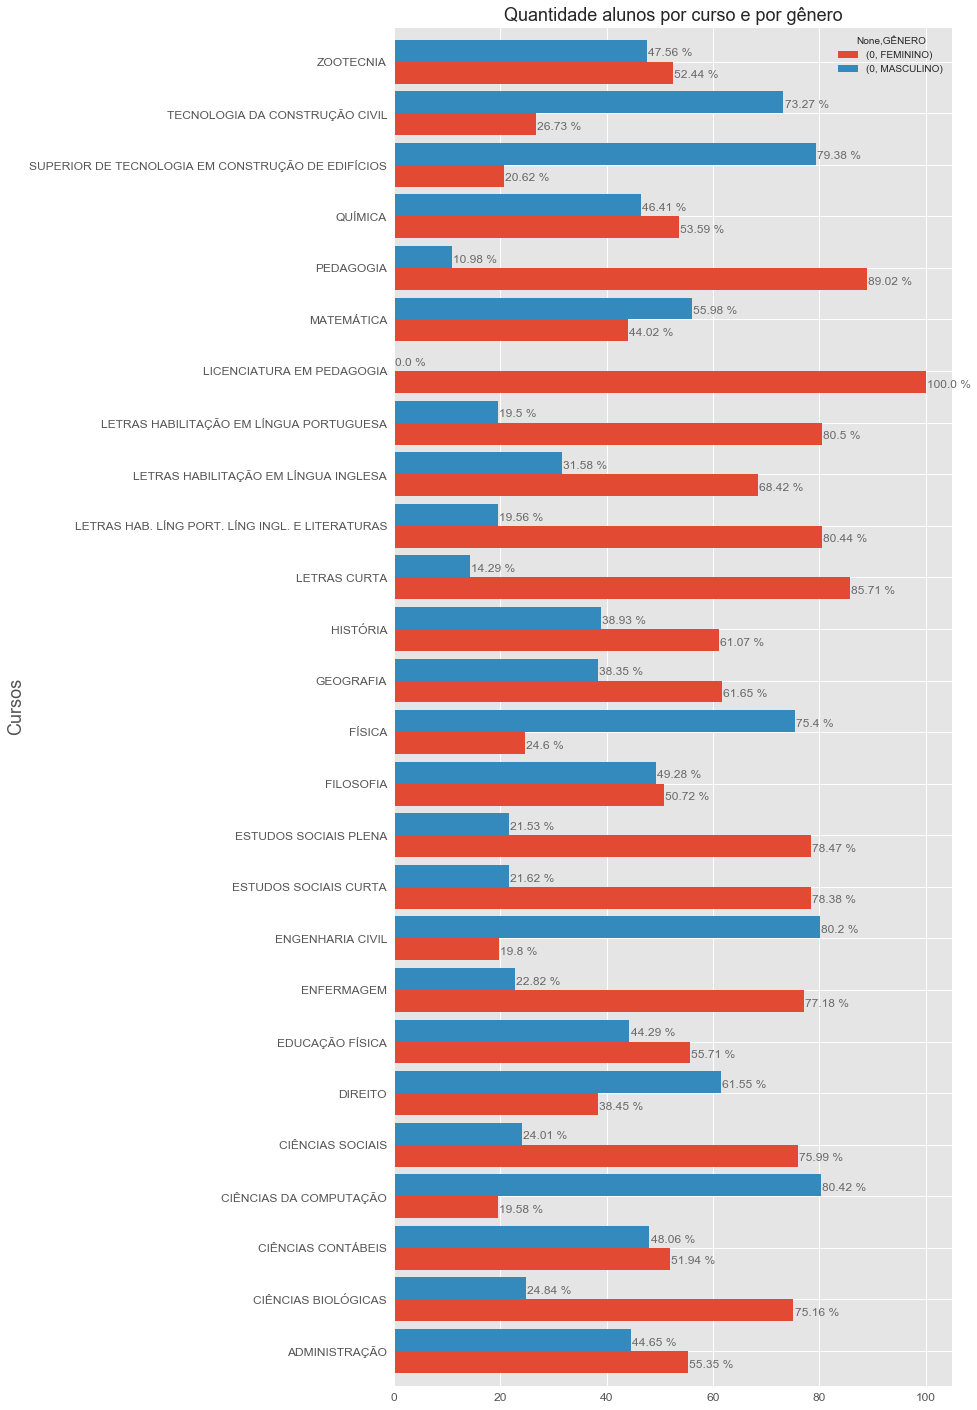

In [12]:
ax = df.groupby(['CURSO','GÊNERO']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).to_frame().unstack().plot(kind='barh', figsize=(10, 25), width=0.85, fontsize=12)

ax.set_title('Quantidade alunos por curso e por gênero', fontsize=18)
ax.set_ylabel('Cursos', fontsize=18)

total = df['CURSO'].count()

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.2, i.get_y()+.11, str(round(i.get_width(), 2)) + ' %', fontsize=12, color='dimgrey')

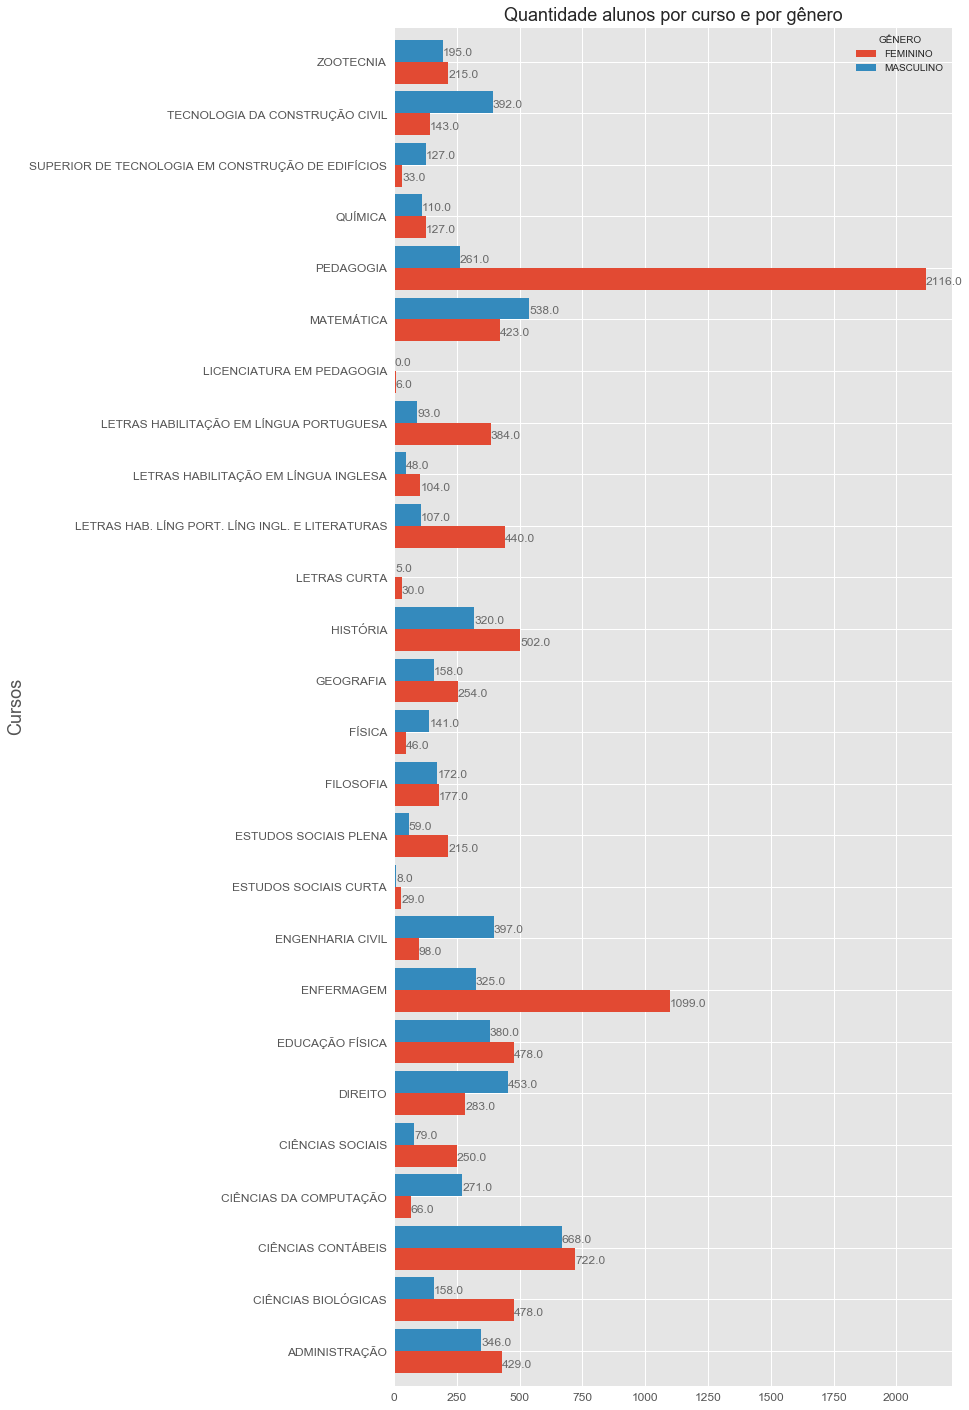

In [13]:
ax = df.groupby(['CURSO','GÊNERO']).size().unstack().plot(kind='barh', figsize=(10, 25), width=0.85, fontsize=12)

ax.set_title('Quantidade alunos por curso e por gênero', fontsize=18)
ax.set_ylabel('Cursos', fontsize=18)

total = df['CURSO'].count()

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.2, i.get_y()+.11, str(i.get_width()), fontsize=12, color='dimgrey')

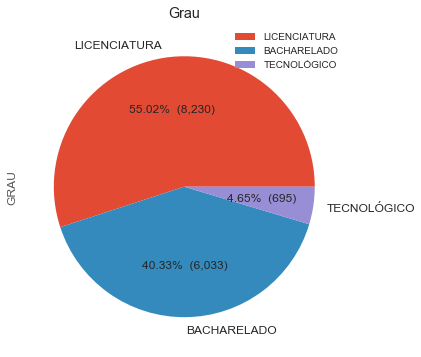

In [14]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

df['GRAU'].value_counts().plot(title='Grau', kind='pie', figsize=(6, 6), legend=True, fontsize=12, autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(df['GRAU'].value_counts())/100))